In [1]:
import pandas as pd

# csv 파일을 로딩
df = pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Ozone,Result,Solar.R,Wind,Temp,Month,Day
0,41.00000,0,190.000000,7.4,67,5,1
1,36.00000,0,118.000000,8.0,72,5,2
2,12.00000,0,149.000000,12.6,74,5,3
3,18.00000,0,313.000000,11.5,62,5,4
4,42.12931,1,185.931507,14.3,56,5,5


In [2]:
df.columns

Index(['Ozone', 'Result', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [3]:
df.shape

(153, 7)

In [4]:
df.describe()

,Ozone,Result,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,0.529412,185.931507,9.957516,77.882353,6.993464,15.803922
std,28.693372,0.500773,87.960267,3.523001,9.465270,1.416522,8.864520
min,1.000000,0.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,21.000000,0.000000,120.000000,7.400000,72.000000,6.000000,8.000000
50%,42.129310,1.000000,194.000000,9.700000,79.000000,7.000000,16.000000
75%,46.000000,1.000000,256.000000,11.500000,85.000000,8.000000,23.000000
max,168.000000,1.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [5]:
# 오존량 분류를 기준으로 한 평균값들
df.groupby("Result").mean()

,Ozone,Solar.R,Wind,Temp,Month,Day
Result,,,,,,
0,20.902778,166.302702,11.270833,72.652778,6.972222,15.180556
1,60.997339,203.379334,8.790123,82.530864,7.012346,16.358025


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0, 0.5, '빈도')

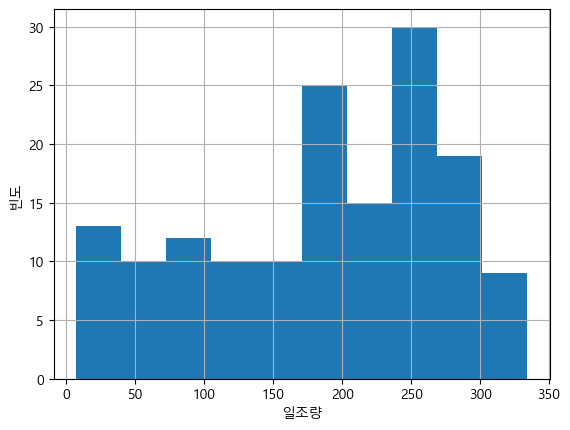

In [7]:
df["Solar.R"].hist()
plt.xlabel('일조량')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

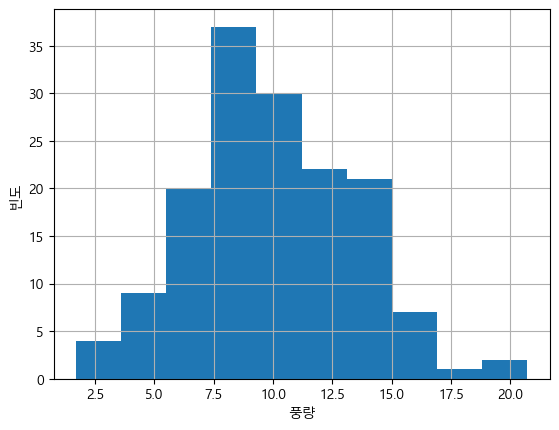

In [8]:
df["Wind"].hist()
plt.xlabel('풍량')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

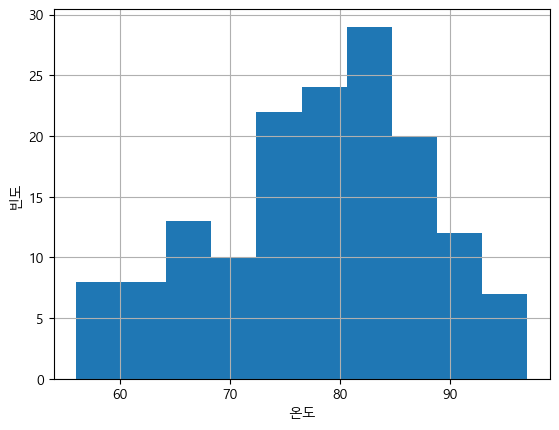

In [9]:
df["Temp"].hist()
plt.xlabel('온도')
plt.ylabel('빈도')

In [10]:
df["Result"].value_counts()

1    81
0    72
Name: Result, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

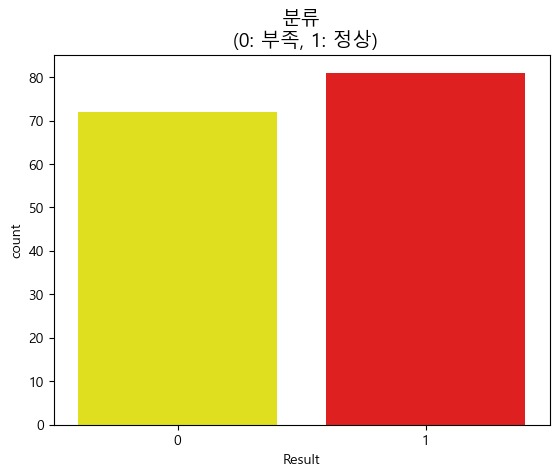

In [11]:
import seaborn as sns

colors = ["yellow", "red"]
sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)
# 불균형 데이터셋

In [12]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

In [13]:
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp = pd.concat([X_samp,y_samp],axis=1)
df_samp["Result"].value_counts()

0    72
1    72
Name: Result, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족 || 1: 정상)')

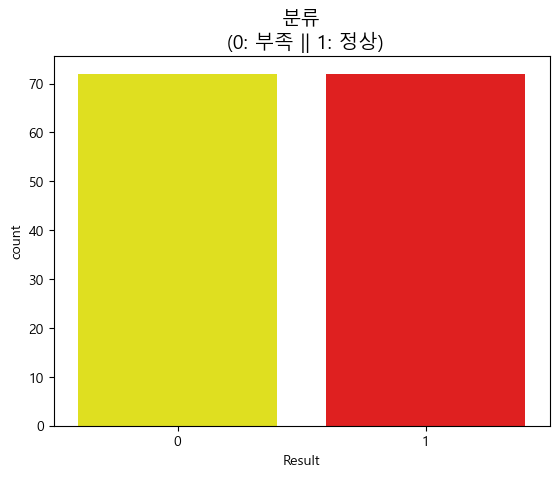

In [14]:
colors = ["yellow", "red"]
sns.countplot('Result', data=df_samp, palette=colors)
plt.title('분류\n (0: 부족 || 1: 정상)', fontsize=14)

In [15]:
cols=['Solar.R', 'Wind', 'Temp']
X = X_samp[cols]
y = y_samp['Result']

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [17]:
# 트리 모델 생성
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))
# 과적합 발생

학습용: 1.0
검증용: 0.6896551724137931


In [18]:
# max_depth 가지치기
model = DecisionTreeClassifier(max_depth=3,random_state=10)
model.fit(X_train, y_train)
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 0.8608695652173913
검증용: 0.7931034482758621


In [19]:
# confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[11,  3],
       [ 3, 12]], dtype=int64)

In [20]:
df_cm = pd.DataFrame(cm, index=[0, 1],
columns = [0, 1])
df_cm

,0,1
0,11,3
1,3,12


<AxesSubplot:title={'center':'Confusion Matrix'}>

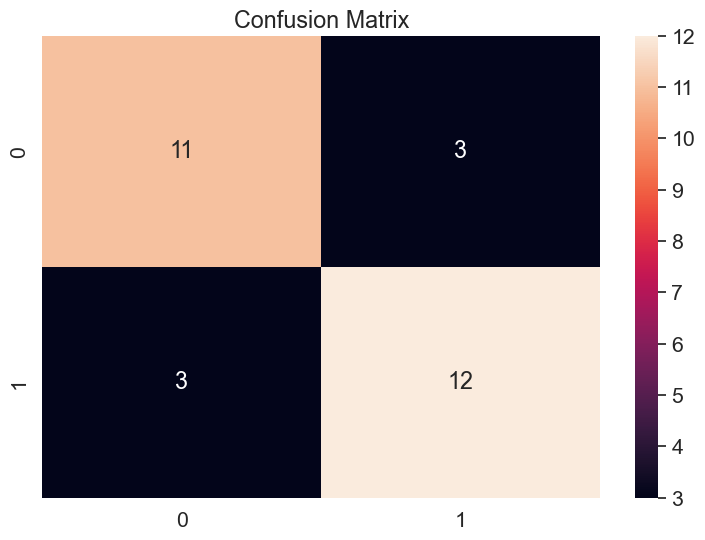

In [21]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

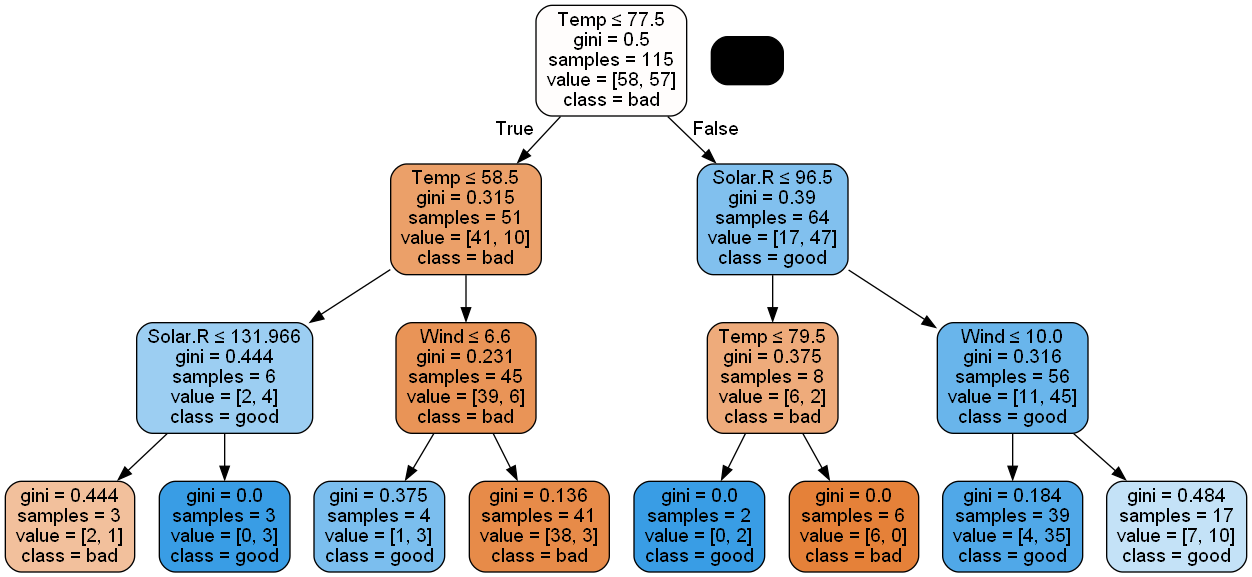

In [22]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import os

os.environ["PATH"] +=\
os.pathsep + 'c:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = export_graphviz(model, out_file=None, feature_names=cols, class_names=["bad","good"], filled=True,
                            rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [23]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)
import numpy as np
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)
def plot_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

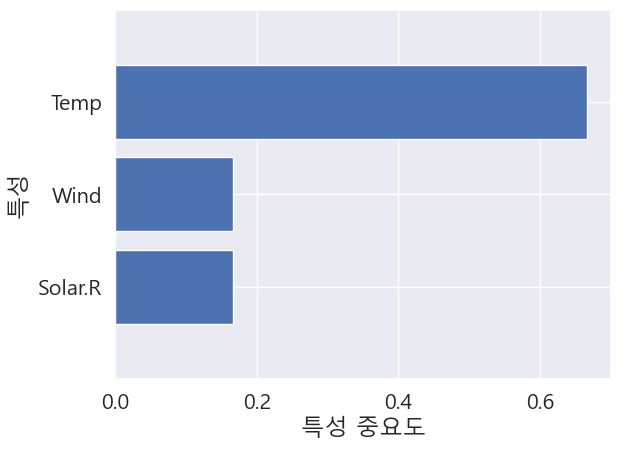

In [24]:
plot_tree(model)

In [25]:
# 랜덤포레스트 : 여러 개의 의사결정나무를 만들고 투표를 통해 다수결로 결과를 결정함
# 처리가 빠르고 분류 정밀도가 높다.
from sklearn.ensemble import RandomForestClassifier

# 100개의 트리로 구성된 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=100, random_state=10,max_depth=3)
forest.fit(X_train, y_train)
print("학습용:", forest.score(X_train, y_train))
print("검증용:", forest.score(X_test, y_test))

학습용: 0.8521739130434782
검증용: 0.7586206896551724


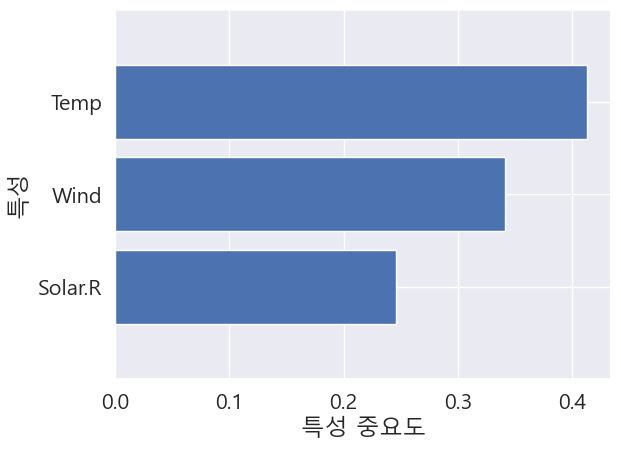

In [26]:
# 랜덤 포레스트에서 제공하는 각 트리의 특성 중요도
# 랜덤 포레스트는 좀 더 폭넓은 시각으로 데이터를 관찰할 수 있다
plot_tree(forest)